(-1.8774763389668039, 4.73916889797604, -1.7047546030348233, 6.633577833428513)

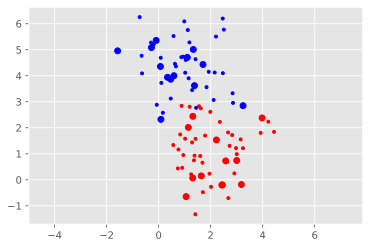

In [10]:
from sklearn.model_selection import train_test_split
from jenga.cleaning.outlier_removal import AutoGluonCleaner

from jenga.corruptions.categorical import SwapValues
from jenga.corruptions.numeric import SwappedValues, Outliers, Scaling
from jenga.corruptions.text import BrokenCharacters
from jenga.corruptions.missing import ( MissingValuesHighEntropy, 
                                  MissingValuesLowEntropy, 
                                  MissingValues
                                )

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test = pd.DataFrame(X_train), pd.DataFrame(X_test)

plt.plot(X_train.loc[y_train>0,0],X_train.loc[y_train>0,1],'r.',
         X_train.loc[y_train<=0,0],X_train.loc[y_train<=0,1],'b.',
        )
plt.plot(X_test.loc[y_test>0,0],X_test.loc[y_test>0,1],'ro',
         X_test.loc[y_test<=0,0],X_test.loc[y_test<=0,1],'bo',
        )
plt.axis('equal')

(-1.8774763389668039, 4.73916889797604, -12.852042021106433, 22.32849505126741)

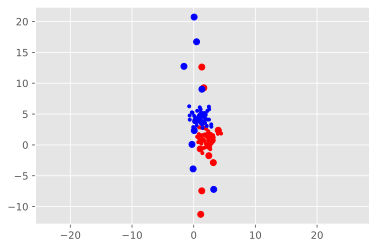

In [11]:
perturbation = Outliers(0.5, [1])
X_corrupted = perturbation(X_test.copy())

plt.plot(X_train.loc[y_train>0,0],X_train.loc[y_train>0,1],'r.',
         X_train.loc[y_train<=0,0],X_train.loc[y_train<=0,1],'b.',
        )
plt.plot(X_corrupted.loc[y_test>0,0],X_corrupted.loc[y_test>0,1],'ro',
         X_corrupted.loc[y_test<=0,0],X_corrupted.loc[y_test<=0,1],'bo',
        )
plt.axis('equal')

In [12]:
agcl = AutoGluonCleaner(X_train)

No output_directory specified. Models will be saved in: AutogluonModels/ag-20200328_001010/
Beginning AutoGluon training ...
AutoGluon will save models to AutogluonModels/ag-20200328_001010/
Train Data Rows:    75
Train Data Columns: 2
Preprocessing data ...
Here are the first 10 unique label values in your data:  [-0.65392827  1.0220286   0.829832   -0.29421492  1.02102468  1.41942144
  1.19404184  2.82705807  3.15492712  0.76241061]
AutoGluon infers your prediction problem is: regression  (because dtype of label-column == float and many unique label-values observed)
If this is wrong, please specify `problem_type` argument in fit() instead (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

Feature Generator processed 75 data points with 1 features
Original Features:
	float features: 1
Generated Features:
	int features: 0
All Features:
	float features: 1
	int features: 0
	Data preprocessing and feature engineering runtime = 0.03s ...
AutoGluon will gauge 

	float features: 1
Generated Features:
	int features: 0
All Features:
	float features: 1
	int features: 0
	Data preprocessing and feature engineering runtime = 0.04s ...
AutoGluon will gauge predictive performance using evaluation metric: root_mean_squared_error
To change this, specify the eval_metric argument of fit()
AutoGluon will early stop models using evaluation metric: root_mean_squared_error
Fitting model: RandomForestRegressorMSE ...
	-1.6891	 = Validation root_mean_squared_error score
	0.78s	 = Training runtime
	0.12s	 = Validation runtime
Fitting model: ExtraTreesRegressorMSE ...
	-1.7607	 = Validation root_mean_squared_error score
	0.53s	 = Training runtime
	0.11s	 = Validation runtime
Fitting model: KNeighborsRegressorUnif ...
	-2.2877	 = Validation root_mean_squared_error score
	0.01s	 = Training runtime
	0.12s	 = Validation runtime
Fitting model: KNeighborsRegressorDist ...
	-1.8458	 = Validation root_mean_squared_error score
	0.01s	 = Training runtime
	0.12s	 = Validati

(-0.9884207324972845, 4.696832916715587, -4.535263491447364, 9.678065474364479)

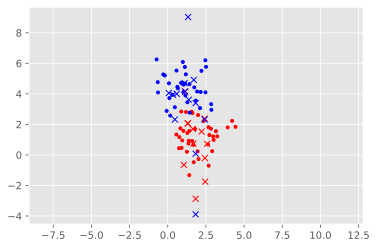

In [14]:
plt.plot(X_train.loc[y_train>0,0],X_train.loc[y_train>0,1],'r.',
         X_train.loc[y_train<=0,0],X_train.loc[y_train<=0,1],'b.',
        )
# plt.plot(X_corrupted.loc[y_test>0,0],X_corrupted.loc[y_test>0,1],'ro',
#          X_corrupted.loc[y_test<=0,0],X_corrupted.loc[y_test<=0,1],'bo',
#         )

plt.plot(XX.loc[y_test>0,0],XX.loc[y_test>0,1],'rx',
         XX.loc[y_test<=0,0],XX.loc[y_test<=0,1],'bx',
        )
plt.axis('equal')

In [15]:
(XX != X_corrupted).sum()

0    8
1    8
dtype: int64